In [2]:
import numpy as np
import pandas as pd
import csv
from matplotlib import cm
import sys
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
import numpy
from numpy.random import randn
from scipy import array, newaxis
import seaborn as sns
from matplotlib.patches import Rectangle
from scipy.interpolate import InterpolatedUnivariateSpline

[-0.5 -0.2 -0.1]


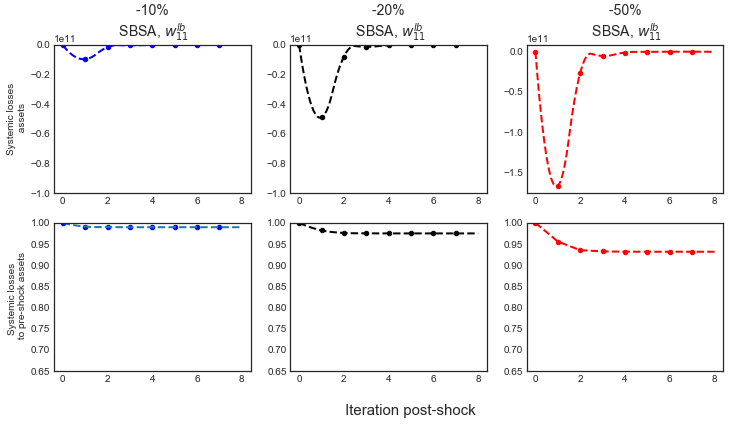

In [3]:
sns.set_style("white")

#Only Standard bank! 
#plt.rc('font',**{'family':'sans-serif','sans-serif':['Times New Roman']})

df = pd.read_csv('shocks_1e-13_m12_sbsa.csv')
keys = np.unique(df['shock'])

print keys
for key in keys:
    if key == -0.1:
        I1 = np.argwhere(df['shock']==key).squeeze()
    if key == -0.2:
        I2 = np.argwhere(df['shock']==key).squeeze()
    if key == -0.5:
        I3 = np.argwhere(df['shock']==key).squeeze()

#Make x values
x1 = np.array(df['current_step'][I1])
x1new = np.linspace(0, len(x1), num=100)
x2 = np.array(df['current_step'][I2])
x2new = np.linspace(0, len(x1), num=100)
x3 = np.array(df['current_step'][I3])
x3new = np.linspace(0, len(x3), num=100)
 
#Make y values
y1 = df['system_TAS'][I1] 
y2 = df['system_TAS'][I2] 
y3 = df['system_TAS'][I3] 
#Smoothing system TAs
f1 = InterpolatedUnivariateSpline(x1, y1 , k=2)
f2 = InterpolatedUnivariateSpline(x2, y2 , k=2)
f3 = InterpolatedUnivariateSpline(x3, y3 , k=2)

r1 = f1(x1new)
#r1[r1 > 1] = 0
r2 = f2(x2new)
r2[r2 > 0.1] = 0
r3 = f3(x3new)
r3[r3 > 0.1] = 0


y4 = df['asset_to_pre_shock'][I1] 
y5 = df['asset_to_pre_shock'][I2] 
y6 = df['asset_to_pre_shock'][I3] 

#-10
f4 = InterpolatedUnivariateSpline(x1, y4 , k=2)
r4 = f4(x1new)

f5 = InterpolatedUnivariateSpline(x2, y5 , k=2)
r5 = f5(x2new)
f6 = InterpolatedUnivariateSpline(x3, y6 , k=1)
r6 = f6(x3new)

#fig,  ax  = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
fig, axes = plt.subplots(nrows=2, ncols=3,   figsize=(12,6))

#ax = ax1.twinx() # THIS IS for two axesin one chart, not needed
########## 10 % shocl
axes[0][0].plot(x1,y1,'o',  x1new,r1,'--', lw=2,  ms=4.5, color='B', label="-10%")
axes[0][0].set_title(" -10% \n SBSA, $w^{lb}_{11}$", fontsize=14)
axes[0][0].set_ylim(-1e11,0)
axes[1][0].plot(x2,y4,'bo',  x2new, r4, '--', lw=2,  ms=4.5, label="-20%")
axes[1][0].set_ylabel("Systemic losses \n to pre-shock assets")
axes[1][0].set_ylim(0.65,1)


##########
########## 20 % 
axes[0][1].plot(x2,y2,'bo',  x2new,r2,'--', lw=2, color="black", ms=4.5, label="-20%")
axes[0][1].set_title(" -20% \n SBSA, $w^{lb}_{11}$", fontsize=14)
axes[1][1].plot(x2,y5,'bo',  x2new, r5, '--', lw=2, color="black",  ms=4.5, label="-20%")
axes[1][1].set_ylim(0.65,1)
axes[0][1].set_ylim(-1e11,0)


##########  

########## 50 % 
axes[0][2].plot(x3,y3,'o',  x3new,r3,'--', lw=2,  ms=4.5, color='red', label="-50%")
axes[0][2].set_title(" -50% \n SBSA, $w^{lb}_{11}$", fontsize=14)

axes[1][2].plot(x3,y6,'o',  x3new,r6,'--', lw=2,  ms=4.5, color='red', label="-50%")
axes[1][2].set_ylim(0.65,1)

xaxis_label = plt.xlabel('\n Iteration post-shock', fontsize=15)
xaxis_label.set_position((-0.6,3)) 

##########  

# plt.plot(x1,y1,'o',  x1new,f1(x1new),'--', lw=1,  ms=3.5, color='r')
# plt.plot(x2,y2,'bo', x2new,f2(x2new),'--', lw=1,  ms=3.5)
#ax.set_xlim(0, 7)

axes[0][0].set_ylabel("Systemic losses\n assets") #, fontsize=15
#fig.savefig('/Users/Tina/Dropbox/phd/projects/dissertation/write_up/Chapters/Chapter2/figures/foo_sbsa.pdf', format="pdf") #bbox_inches='tight'
# ax[0].set_ylabel(r"Asset $\delta$ sales", fontsize=12)
#ax.set_title("Asset sales in response to SA bond price shock\n", fontsize=17)
#handles, labels = axes.get_legend_handles_labels()
#p1 = Rectangle((0,0), 1, 1, fc="w")
#handles.append(p1)
#labels.append(r'RSA bond price shock')
#ax.legend(handles, ['-10%', 'smoothed','-15%', 'smoothed', 'RSA bond price shock' ], fontsize=12, loc='best')


plt.show()




In [ ]:
# Fig 7 Effect on cash reserves

[-0.5 -0.2 -0.1]


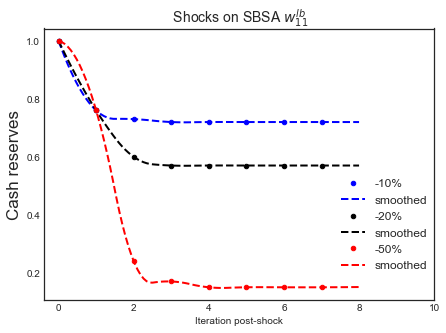

In [4]:
#Only standard bank 

plt.show()
#rho = 1e-13
import numpy as np
import pandas as pd
import csv
from matplotlib import cm
import sys
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
import numpy
from numpy.random import randn
from scipy import array, newaxis
import seaborn as sns
from matplotlib.patches import Rectangle
from scipy.interpolate import InterpolatedUnivariateSpline
df = pd.read_csv('shocks_1e-13_m12_sbsa.csv')
 

#df = pd.read_csv('test_3.csv')
keys = np.unique(df['shock'])

print keys
for key in keys:
    if key == -0.1:
        I1 = np.argwhere(df['shock']==key).squeeze()
    if key == -0.2:
        I2 = np.argwhere(df['shock']==key).squeeze()
    if key == -0.5:
        I3 = np.argwhere(df['shock']==key).squeeze()


x1 = np.array(df['current_step'][I1])
x1new = np.linspace(0, len(x1), num=100)

x2 = np.array(df['current_step'][I2])
x2new = np.linspace(0, len(x1), num=100)

x3 = np.array(df['current_step'][I3])
x3new = np.linspace(0, len(x3), num=100)
 
 
y1 = df['cash_reserves_rel'][I1] 
y2 = df['cash_reserves_rel'][I2] 
y3 = df['cash_reserves_rel'][I3] 
#Smoothing
#System TAs
f1 = InterpolatedUnivariateSpline(x1, y1 , k=2)
f2 = InterpolatedUnivariateSpline(x2, y2 , k=2)
f3 = InterpolatedUnivariateSpline(x3, y3 , k=2)

r1 = f1(x1new)
#r1[r1 > 1] = 0
r2 = f2(x2new)

r3 = f3(x3new)
 

y4 = df['system_cash_reserves'][I1] 
y5 = df['system_cash_reserves'][I2] 
y6 = df['system_cash_reserves'][I3] 

#-10
f4 = InterpolatedUnivariateSpline(x1, y4 , k=2)
r4 = f4(x1new)

f5 = InterpolatedUnivariateSpline(x2, y5 , k=2)
r5 = f5(x2new)
f6 = InterpolatedUnivariateSpline(x3, y6 , k=2)
r6 = f6(x3new)

#fig,  ax  = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7,5))

#ax = ax1.twinx()

# axes[0].plot(x1,y1,'o',  x1new,r1,'--', lw=2,  ms=4.5, color='b', label="-10%")
# axes[0].plot(x2,y2,'bo',  x2new,r2,'--', lw=2,  ms=4.5, color='black', label="-20%")
# axes[0].plot(x3,y3,'bo',  x3new,r3,'--', lw=2,  ms=4.5, color='r', label="-50%")

# axes[0].set_title(" -10%, $w^{tb}_1$", fontsize=11)

#ax.plot(x3,y3,'bo',  x3new,r3,'--', lw=2,  ms=4.5, label="-20%")

axes.plot(x2,y1,'o',  x2new,r1 ,'--', lw=2,  ms=4.5, color='b', label="-10%")
axes.plot(x3,y2,'o',  x3new,r2 ,'--', lw=2,  ms=4.5, color='black', label="-20%")
axes.plot(x3,y3,'o',  x3new,r3 ,'--', lw=2,  ms=4.5, color='r', label="-50%")


# plt.plot(x1,y1,'o',  x1new,f1(x1new),'--', lw=1,  ms=3.5, color='r')
# plt.plot(x2,y2,'bo', x2new,f2(x2new),'--', lw=1,  ms=3.5)


#axes.set_xlim(0, 6)
start =0
end = 10
stepsize = 2
axes.set_xticks(np.arange(start, end+1, stepsize))

handles, labels = axes.get_legend_handles_labels()
p1 = Rectangle((0,0), 1, 1, fc="w")
handles.append(p1)
labels.append(r'RSA bond price shock')
axes.legend(handles, ['-10%', 'smoothed','-20%', 'smoothed', '-50%', 'smoothed' ], fontsize=12, loc=(0.75,0.09))#loc=(0.75,0.13)

axes.set_title(" Shocks on SBSA $w^{lb}_{11}$", fontsize=14)

axes.set_xlabel("Iteration post-shock")
#ax[0].set_ylim(-4e11, 0.1e11)
#axes.set_ylabel(r"$\bf{Cash reserves}$", fontsize=15)
axes.set_ylabel("Cash reserves", fontsize=17)


#fig.savefig('/Users/Tina/Dropbox/phd/projects/dissertation/write_up/Chapters/Chapter2/figures/cash.pdf', format="pdf", bbox_inches='tight')
plt.show()


# ax[0].set_ylabel(r"Asset $\delta$ sales", fontsize=12)
#ax.set_title("Asset sales in response to SA bond price shock\n", fontsize=17)
#



In [ ]:
Extra: 
    

In [ ]:
ALL

 
#rho = 1e-13
import numpy as np
import pandas as pd
import csv
from matplotlib import cm
import sys
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
import numpy
from numpy.random import randn
from scipy import array, newaxis
import seaborn as sns
from matplotlib.patches import Rectangle
from scipy.interpolate import InterpolatedUnivariateSpline
df = pd.read_csv('/Users/Tina/git_repos/BlackRhino/examples/firesales_SA/output/shocks_1e-13_29_8_all_m14.csv')
 

#df = pd.read_csv('test_3.csv')
keys = np.unique(df['shock'])

print keys
for key in keys:
    if key == -0.1:
        I1 = np.argwhere(df['shock']==key).squeeze()
    if key == -0.2:
        I2 = np.argwhere(df['shock']==key).squeeze()
    if key == -0.5:
        I3 = np.argwhere(df['shock']==key).squeeze()


x1 = np.array(df['current_step'][I1])
x1new = np.linspace(0, len(x1), num=100)

x2 = np.array(df['current_step'][I2])
x2new = np.linspace(0, len(x1), num=100)

x3 = np.array(df['current_step'][I3])
x3new = np.linspace(0, len(x3), num=100)
 
 
# y1 = df['cash_reserves_rel'][I1] 
# y2 = df['cash_reserves_rel'][I2] 
# y3 = df['cash_reserves_rel'][I3] 
#Smoothing
#System TAs
f1 = InterpolatedUnivariateSpline(x1, y1 , k=2)
f2 = InterpolatedUnivariateSpline(x2, y2 , k=2)
f3 = InterpolatedUnivariateSpline(x3, y3 , k=2)

r1 = f1(x1new)
#r1[r1 > 1] = 0
r2 = f2(x2new)

r3 = f3(x3new)
 

y4 = df['cash_reserves_rel'][I1] 
y5 = df['cash_reserves_rel'][I2] 
y6 = df['cash_reserves_rel'][I3] 

#-10
f4 = InterpolatedUnivariateSpline(x1, y4 , k=1)
r4 = f4(x1new)

f5 = InterpolatedUnivariateSpline(x2, y5 , k=1)
r5 = f5(x2new)
f6 = InterpolatedUnivariateSpline(x3, y6 , k=1)
r6 = f6(x3new)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,4))
 
# Put a legend to the right of the current axis
#axes[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax = ax1.twinx()

axes[0].plot(x2,y1,'o',  x2new,r1 ,'--', lw=2,  ms=4.5, color='b', label="-10%")
axes[0].plot(x3,y2,'o',  x3new,r2 ,'--', lw=2,  ms=4.5, color='black', label="-20%")
axes[0].plot(x3,y3,'o',  x3new,r3 ,'--', lw=2,  ms=4.5, color='r', label="-50%")
axes[1].plot(x2,y4,'o',  x2new,r4 ,'--', lw=2,  ms=4.5, color='b', label="-10%")
axes[1].plot(x3,y5,'o',  x3new,r5 ,'--', lw=2,  ms=4.5, color='black', label="-20%")
axes[1].plot(x3,y6,'o',  x3new,r6 ,'--', lw=2,  ms=4.5, color='r', label="-50%")
 
start =0
end = 10
stepsize = 2
axes[0].set_xticks(np.arange(start, end+1, stepsize))

handles, labels = axes[0].get_legend_handles_labels()
p1 = Rectangle((0,0), 1, 1, fc="w")
handles.append(p1)
labels.append(r'RSA bond price shock')
axes[2].legend(handles, ['-10%', 'smoothed','-20%', 'smoothed', '-50%', 'smoothed' ], fontsize=12, loc=(-0.1,0.09))#loc=(0.75,0.13)
axes[0].set_title(" Shocks on SBSA $w^{lb}_{11}$", fontsize=14)
axes[0].set_xlabel("Iteration post-shock")
axes[0].set_ylabel("Cash reserves", fontsize=17)

axes[2].set_axis_off()
#fig.savefig('/Users/Tina/Dropbox/phd/projects/dissertation/write_up/Chapters/Chapter2/figures/cash.pdf', format="pdf", bbox_inches='tight')
plt.show()



[-0.5 -0.2 -0.1]


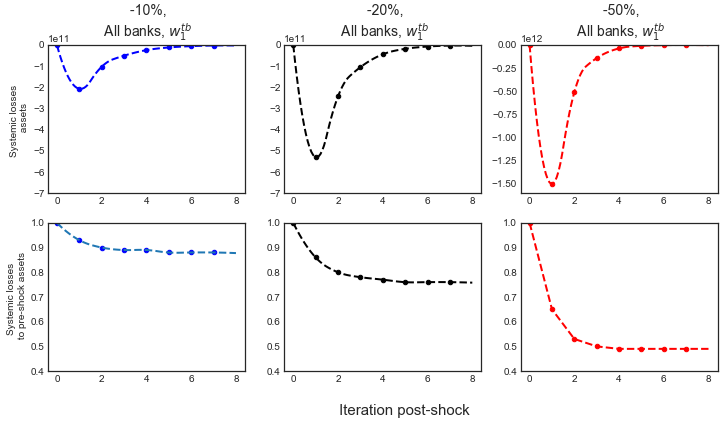

In [5]:
 sns.set_style("white")

#plt.rc('font',**{'family':'sans-serif','sans-serif':['Times New Roman']})

df = pd.read_csv('/Users/Tina/git_repos/BlackRhino/examples/firesales_SA/output/shocks_all.csv')
keys = np.unique(df['shock'])

print keys
for key in keys:
    if key == -0.03:
        I1 = np.argwhere(df['shock']==key).squeeze()
    if key == -0.2:
        I2 = np.argwhere(df['shock']==key).squeeze()
    if key == -0.5:
        I3 = np.argwhere(df['shock']==key).squeeze()

#Make x values
x1 = np.array(df['current_step'][I1])
x1new = np.linspace(0, len(x1), num=100)
x2 = np.array(df['current_step'][I2])
x2new = np.linspace(0, len(x1), num=100)
x3 = np.array(df['current_step'][I3])
x3new = np.linspace(0, len(x3), num=100)
 
#Make y values
y1 = df['system_TAS'][I1] 
y2 = df['system_TAS'][I2] 
y3 = df['system_TAS'][I3] 
#Smoothing system TAs
f1 = InterpolatedUnivariateSpline(x1, y1 , k=2)
f2 = InterpolatedUnivariateSpline(x2, y2 , k=2)
f3 = InterpolatedUnivariateSpline(x3, y3 , k=2)

r1 = f1(x1new)
#r1[r1 > 1] = 0
r2 = f2(x2new)
r2[r2 > 0.1] = 0
r3 = f3(x3new)
r3[r3 > 0.1] = 0


y4 = df['asset_to_pre_shock'][I1] 
y5 = df['asset_to_pre_shock'][I2] 
y6 = df['asset_to_pre_shock'][I3] 

#-10
f4 = InterpolatedUnivariateSpline(x1, y4 , k=2)
r4 = f4(x1new)

f5 = InterpolatedUnivariateSpline(x2, y5 , k=2)
r5 = f5(x2new)
f6 = InterpolatedUnivariateSpline(x3, y6 , k=1)
r6 = f6(x3new)

#fig,  ax  = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
fig, axes = plt.subplots(nrows=2, ncols=3,   figsize=(12,6))

#ax = ax1.twinx() # THIS IS for two axesin one chart, not needed
########## 10 % shocl
axes[0][0].plot(x1,y1,'o',  x1new,r1,'--', lw=2,  ms=4.5, color='B', label="-10%")
axes[0][0].set_title(" -10%,\n All banks, $w^{tb}_1$", fontsize=14)
axes[0][0].set_ylim(-7e11,0)
axes[1][0].plot(x2,y4,'bo',  x2new, r4, '--', lw=2,  ms=4.5, label="-20%")
axes[1][0].set_ylabel("Systemic losses \n to pre-shock assets")

axes[1][0].set_ylim(0.4,1)


##########
########## 20 % 
axes[0][1].plot(x2,y2,'bo',  x2new,r2,'--', lw=2, color="black", ms=4.5, label="-20%")
axes[0][1].set_title(" -20%,\n All banks, $w^{tb}_1$", fontsize=14)
axes[1][1].plot(x2,y5,'bo',  x2new, r5, '--', lw=2, color="black",  ms=4.5, label="-20%")
axes[1][1].set_ylim(0.4,1)
axes[0][1].set_ylim(-7e11,0)


##########  

########## 50 % 
axes[0][2].plot(x3,y3,'o',  x3new,r3,'--', lw=2,  ms=4.5, color='red', label="-50%")
axes[0][2].set_title(" -50%,\n All banks, $w^{tb}_1$", fontsize=14)
axes[0][2].set_ylim(-1.6e12,0)
axes[1][2].plot(x3,y6,'o',  x3new,r6,'--', lw=2,  ms=4.5, color='red', label="-50%")
axes[1][2].set_ylim(0.4,1)

xaxis_label = plt.xlabel('\n Iteration post-shock', fontsize=15)
xaxis_label.set_position((-0.6,3)) 
start =0
end = 8
stepsize = 2
axes[0][1].set_xticks(np.arange(start, end+1, stepsize))
axes[0][0].set_xticks(np.arange(start, end+1, stepsize))
axes[1][0].set_xticks(np.arange(start, end+1, stepsize))
axes[1][1].set_xticks(np.arange(start, end+1, stepsize))
axes[0][2].set_xticks(np.arange(start, end+1, stepsize))
axes[1][2].set_xticks(np.arange(start, end+1, stepsize))

 
##########  

# plt.plot(x1,y1,'o',  x1new,f1(x1new),'--', lw=1,  ms=3.5, color='r')
# plt.plot(x2,y2,'bo', x2new,f2(x2new),'--', lw=1,  ms=3.5)
#ax.set_xlim(0, 7)

axes[0][0].set_ylabel("Systemic losses \n assets") #, fontsize=15
#fig.savefig('/Users/Tina/Dropbox/phd/projects/dissertation/write_up/Chapters/Chapter2/figures/foo_all.pdf', format="pdf") #bbox_inches='tight'
# ax[0].set_ylabel(r"Asset $\delta$ sales", fontsize=12)
#ax.set_title("Asset sales in response to SA bond price shock\n", fontsize=17)
#handles, labels = axes.get_legend_handles_labels()
#p1 = Rectangle((0,0), 1, 1, fc="w")
#handles.append(p1)
#labels.append(r'RSA bond price shock')
#ax.legend(handles, ['-10%', 'smoothed','-15%', 'smoothed', 'RSA bond price shock' ], fontsize=12, loc='best')


plt.show()